# Election Data Project - Polls and Donors

In this Data Project we will be looking at data from the 2012 election.

In this project we will analyze two datasets. The first data set will be the results of political polls. We will analyze this aggregated poll data and answer some questions:

    1.) Who was being polled and what was their party affiliation?
    2.) Did the poll results favor Romney or Obama?
    3.) How do undecided voters effect the poll?
    4.) Can we account for the undecided voters?
    5.) How did voter sentiment change over time?
    6.) Can we see an effect in the polls from the debates?

We'll discuss the second dataset later on!

Let's go ahead and start with our standard imports:

In [27]:
# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Set display options
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

The data for the polls will be obtained from HuffPost Pollster. You can check their website [here](http://elections.huffingtonpost.com/pollster). There are some pretty awesome politcal data stes to play with there so I encourage you to go and mess around with it yourself after completing this project.

In [28]:
poll_data = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

Now that we have our data, we can set it as a DataFrame.

In [29]:
# Set poll data as pandas DataFrame
poll_df = pd.read_csv(poll_data)

# Let's get a glimpse at the data
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


Great! Now let's get a quick look with .head()

## Question 1: Preview DataFrame

In [30]:
# Your code should display the first five rows of poll_df

poll_df[:5]


,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


Your code should generate similar output as below.


![title](img/preview_df.png)

Let's go ahead and get a quick visualization overview of the affiliation for the polls.

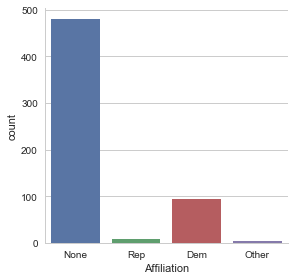

In [31]:
# Factorplot the affiliation
sns.factorplot('Affiliation',data=poll_df, kind='count')

Looks like we are overall relatively neutral, but still leaning towards Democratic Affiliation, it will be good to keep this in mind. Let's see if sorting by the Population hue gives us any further insight into the data.

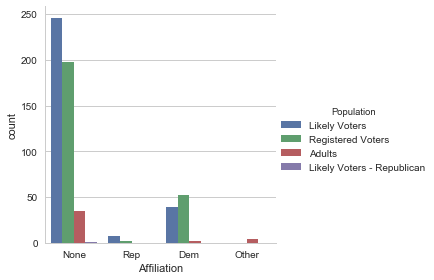

In [32]:
# Factorplot the affiliation by Population
sns.factorplot('Affiliation',data=poll_df, kind='count',hue='Population')

Looks like we have a strong showing of likely voters and Registered Voters, so the poll data should hopefully be a good reflection on the populations polled. 

Let's go ahead and take a look at the averages for Obama, Romney , and the polled people who remained undecided.

In [33]:
# First we'll get the average
avg = pd.DataFrame(poll_df.mean()) 
avg.drop('Number of Observations',axis=0,inplace=True)

avg

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN
Question Iteration,1.000000


## Question 2: Get the standard deviation

You code should generate a new dataframe, std, which stores standard deviations of each column in poll_df.


In [34]:
std = pd.DataFrame(poll_df.std())# Your code
std.drop('Number of Observations',axis=0,inplace=True)
std

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726
Question Text,NaN
Question Iteration,0.000000


Your code should generate similar output as below.

![title](img/std.png)

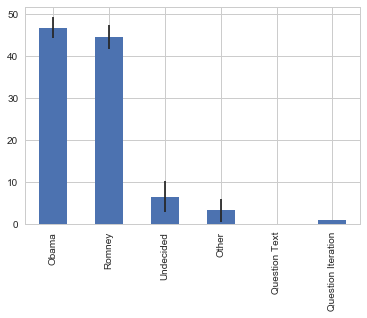

In [35]:
# now plot using pandas built-in plot, with kind='bar' and yerr='std'
avg.plot(yerr=std,kind='bar',legend=False)

Interesting to see how close these polls seem to be, especially considering the undecided factor. Let's take a look at the numbers.

## Question 3: Concatenate our Average and Std DataFrames

You code should generate a new dataframe, poll_avg.


In [36]:
# Concatenate our Average and Std DataFrames
poll_avg = pd.DataFrame({'Average':poll_df.mean(),'STD':poll_df.std()})[1:]# Your Code

# Don't forget to rename columns


#Show
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726
Question Text,NaN,NaN
Question Iteration,1.000000,0.000000


Your code should generate similar output as below.

![title](img/poll_avg.png)

Looks like the polls indicate it as a fairly close race, but what about the undecided voters? Most of them will likely vote for one of the candidates once the election occurs. If we assume we split the undecided evenly between the two candidates the observed difference should be an unbiased estimate of the final difference.

If we wanted to, we could also do a quick (and messy) time series analysis of the voter sentiment by plotting Obama/Romney favor versus the Poll End Dates. Let's take a look at how we could quickly do tht in pandas. 

Note: The time is in reverse chronological order. Also keep in mind the multiple polls per end date.

## Question 4: Quick plot of sentiment in the polls versus time

You code should plot the markers of voter sentiments of 'Obama','Romney' and 'Undecided' over time.

You might need to use these arguments of <code>plot</code> function: 

    plot(..., marker='o', markersize=3, linestyle='')

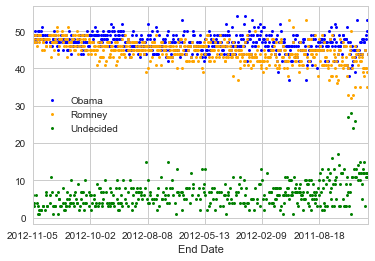

In [37]:
# Your code here
poll_df.plot(x = 'End Date', y = ['Obama', 'Romney', 'Undecided'], color = ['blue','orange','green'], 
             marker = 'o', markersize = '3', linestyle='')

Your code should generate similar output as below.

![title](img/plot_sentiment.png)

## Question 5: Correlation between voter sentiments of  Romney and Undecided

From the graph above, it seems there exists negative correlation between Romney voters and Undecided voters. Write code to test your guess.

In [38]:
# Your code here.

#poll_df.corr(['Obama','Romney','Undecided'])
poll_df['Romney'].corr(poll_df['Undecided'])

-0.62255698175816987

Your code should generate the following output:
    
        -0.62255698175816987

## Question 6 (optional)

Go ahead and try creating a new DataFrame or editing poll_df to make a better visualization!


In [39]:
# Your code


To lead you along the right path for plotting, we'll go ahead and answer another question related to plotting the sentiment versus time. Let's go ahead and plot out the difference between Obama and Romney and how it changes as time moves along. Remember from the last data project we used the datetime module to create timestamps, let's go ahead and use it now.

In [40]:
# For timestamps
from datetime import datetime

Now we'll define a new column in our poll_df DataFrame to take into account the difference between Romney and Obama in the polls.

## Question 7: Create a new column for the difference between the two candidates
The difference should be calculated as ('Obama' - 'Romney')/100.

In [41]:
# Your code
poll_df['Difference'] = (poll_df['Obama']-poll_df['Romney'])/100

# Preview the new column
poll_df['Difference'].head()

0    0.00
1    0.02
2    0.00
3    0.01
4   -0.01
Name: Difference, dtype: float64

Your code should generate similar output as below.

![title](img/difference.png)

Great! Keep in mind that the Difference column is Obama minus Romney, thus a positive difference indicates a leaning towards Obama in the polls.

Now let's go ahead and see if we can visualize how this sentiment in difference changes over time. 

## Question 8: GroupBy

We will start by using groupby to group the polls by their start data and then sorting it by that Start Date. 

Hint: https://stackoverflow.com/a/30328738/941742

In [42]:
# Set as_index=Flase to keep the 0,1,2,... index. 
# Your code
daily_poll_df = poll_df.sort_values('Start Date',ascending=True).groupby('Start Date', as_index=False).mean()

# Let's go ahead and see what this looks like
daily_poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


Your code should generate similar output as below.

![title](img/groupby.png)

Great! Now plotting the Differencce versus time should be straight forward.

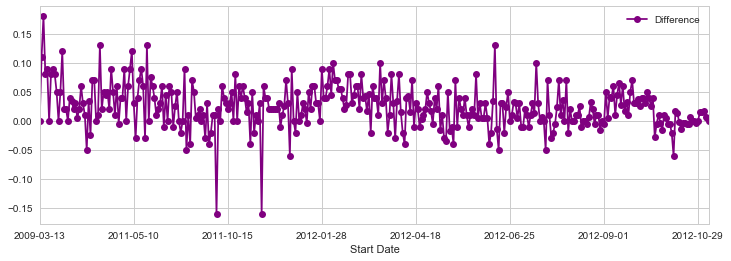

In [43]:
# Plotting the difference in polls between Obama and Romney
fig = daily_poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple')

It would be very interesting to plot marker lines on the dates of the debates and see if there is any general insight to the poll results.

The debate dates were Oct 3rd, Oct 11, and Oct 22nd. Let's plot some lines as markers and then zoom in on the month of October.

In order to find where to set the x limits for the figure we need to find out where the index for the month of October in 2012 is. Here's a simple for loop to find that row. Note, the string format of the date makes this difficult to do without using a lambda expression or a map.

In [44]:
# Set row count and xlimit list
row_in = 0
xlimit = []

# Cycle through dates until 2012-10 is found, then print row index
for date in daily_poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in += 1
        
print(min(xlimit))
print(max(xlimit))

325
352


Great now we know where to set our x limits for the month of October in our figure.

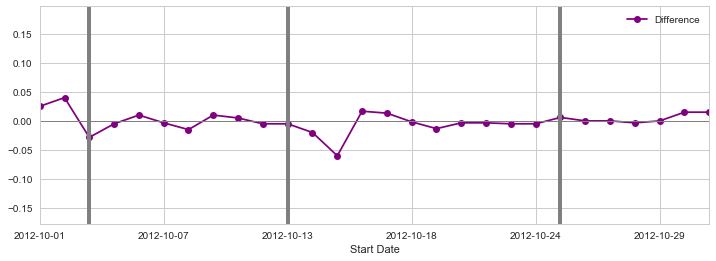

In [45]:
# Start with original figure
fig = daily_poll_df.plot('Start Date','Difference',figsize=(12,4),
                         marker='o',linestyle='-',color='purple',xlim=(325,352))

# Now add the debate markers
plt.axvline(x=325+2, linewidth=4, color='grey')
plt.axvline(x=325+10, linewidth=4, color='grey')
plt.axvline(x=325+21, linewidth=4, color='grey')

# Now add the horizontal line for difference at zero
plt.axhline(y=0, linewidth=1, color='grey')

Surprisingly, thse polls reflect a dip for Obama after the second debate against Romney, even though memory serves that he performed much worse against Romney during the first debate.

For all these polls it is important to remeber how geographical location can effect the value of a poll in predicting the outcomes of a national election. 

# Donor Data Set

Let's go ahead and switch gears and take a look at a data set consisting of information on donations to the federal campaign. 

This is going to be the biggest data set we've looked at so far. 

The questions we will be trying to answer while looking at this Data Set is:

    1.) How much was donated and what was the average donation?
    2.) How did the donations differ between candidates?
    3.) How did the donations differ between Democrats and Republicans?
    4.) What were the demographics of the donors?
    5.) Is there a pattern to donation amounts?
    

In [46]:
# Where to get the data?
url = "https://www.kaggle.com/kadser/2012-election-obama-vs-romney/downloads/Election_Donor_Data.csv.zip"



In [47]:
from zipfile import ZipFile

zipfile = ZipFile("Election_Donor_Data.csv.zip")
donor_df = pd.read_csv(zipfile.open('Election_Donor_Data.csv'),low_memory=False)

In [48]:
# Get a quick overview
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [49]:
# let's also just take a glimpse
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


What might be interesting to do is get a quick glimpse of the donation amounts, and the average donation amount. Let's go ahead and break down the data.

In [50]:
# Get a quick look at the various donation amounts
donor_df['contb_receipt_amt'].value_counts()

 100.00        178188
 50.00         137584
 25.00         110345
 250.00         91182
 500.00         57984
 2500.00        49005
 35.00          37237
 1000.00        36494
 10.00          33986
 200.00         27813
 20.00          17565
 15.00          16163
 150.00         14600
 75.00          13647
 201.20         11718
 30.00          11381
 300.00         11204
 20.12           9897
 5.00            9024
 40.00           5007
 2000.00         4128
 55.00           3760
 1500.00         3705
 3.00            3383
 60.00           3084
 400.00          3066
-2500.00         2727
 110.00          2554
 125.00          2520
 19.00           2474
 112.00          2457
 212.00          2182
 5000.00         1679
 11.00           1668
 70.00           1645
 120.00          1600
 375.00          1573
 56.00           1542
 45.00           1473
 225.00          1463
 190.00          1330
 1250.00         1304
 65.00           1252
 115.00          1179
 350.00          1133
 80.00    

8079 different amounts! Thats quite a variation. Let's look at the average and the std.

## Question 9: Get the mean and standard deviation of donation

In [51]:
# Get the mean donation
don_mean = donor_df['contb_receipt_amt'].mean()# your code

# Get the std of the donation
don_std = donor_df['contb_receipt_amt'].std()# your code

print( 'The average donation was %.2f with a std of %.2f' %(don_mean,don_std))

The average donation was 298.24 with a std of 3749.67


Your code should generate similar output as below.

        The average donation was 298.24 with a std of 3749.67


Wow! That's a huge standard deviation! Let's see if there are any large donations or other factors messing with the distribution of the donations.

In [52]:
# Let's make a Series from the DataFrame, use .copy() to avoid view errors
top_donor = donor_df['contb_receipt_amt'].copy()

# Now sort it
top_donor.sort_values(inplace=True, ascending =False)

# Then check the Series
top_donor

325136     2014490.51
326651     1944042.43
344539     1679114.65
344419     1511192.17
319478      526246.17
335187      512710.91
257270      451726.00
114754       33300.00
217891       25800.00
823345       25000.00
834301       25000.00
65131        12700.00
41888        10000.00
709859       10000.00
90076        10000.00
99829        10000.00
709268       10000.00
708928       10000.00
710730       10000.00
709813       10000.00
993178       10000.00
708138       10000.00
91145        10000.00
709739       10000.00
708919       10000.00
709608       10000.00
876244       10000.00
710177       10000.00
708898       10000.00
708022       10000.00
711167       10000.00
710198       10000.00
923476       10000.00
90044         9000.00
708114        8000.00
564160        7000.00
34342         5414.31
922061        5200.00
939650        5100.00
710161        5000.00
707580        5000.00
991705        5000.00
999980        5000.00
710150        5000.00
68437         5000.00
707587    

Looks like we have some negative values, as well as some huge donation amounts! The negative values are due to the FEC recording refunds as well as donations, let's go ahead and only look at the positive contribution amounts

## Question 10: Get the most common positive donations value counts

You may want to first get rid of the negative values from <code>top_donor</code>, then sort it using function <code>sort_values</code>.

In [53]:
# Get rid of the negative values
# your code
top_donor = top_donor[top_donor >= 0]

# Sort the Series
# Your code
top_donor.sort_values(ascending = True)

# Look at the top 10 most common donations value counts
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

Your code should generate similar output as below.
![title](img/top_donors.png)

Here we can see that the top 10 most common donations ranged from 10 to 2500 dollars.

Let's dive deeper into the data and see if we can seperate donations by Party, in order to do this we'll have to figure out a way of creating a new 'Party' column. We can do this by starting with the candidates and their affliliation. Now let's go ahead and get a list of candidates

In [54]:
# Grab the unique object from the candidate column
candidates = donor_df.cand_nm.unique()
#Show
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

Let's go ahead and seperate Obama from the Republican Candidates by adding a Party Affiliation column. We can do this by using map along a dictionary of party affiliations. Lecture 36 has a review of this topic.

In [55]:
# Dictionary of party affiliation
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

# Now map the party with candidate
donor_df['Party'] = donor_df.cand_nm.map(party_map)

A quick note, we could have done this same operation manually using a for loop, however this operation would be much slower than using the map method.

In [56]:
'''
for i in xrange(0,len(donor_df)):
    if donor_df['cand_nm'][i] == 'Obama,Barack':
        donor_df['Party'][i] = 'Democrat'
    else:
        donor_df['Party'][i] = 'Republican'
'''

"\nfor i in xrange(0,len(donor_df)):\n    if donor_df['cand_nm'][i] == 'Obama,Barack':\n        donor_df['Party'][i] = 'Democrat'\n    else:\n        donor_df['Party'][i] = 'Republican'\n"

Let's look at our DataFrame and also make sure we clear refunds from the contribution amounts.

In [57]:
# Clear refunds
donor_df = donor_df[donor_df.contb_receipt_amt >0]

# Preview DataFrame
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


Let's start by aggregating the data by candidate. We'll take a quick look a the total amounts received by each candidate. First we will look a the total number of donations and then at the total amount.

In [58]:
# Groupby candidate and then display the total number of people who donated
cand_count = donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

# preview cand_count
cand_count

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

Clearly Obama is the front-runner in number of people donating, which makes sense, since he is not competeing with any other democratic nominees. Let's take a look at the total dollar amounts.

## Question 11: Groupby candidate and then display the total amount donated



In [59]:
# Groupby candidate and then displayt the total amount donated
#cand_amount = # Your code
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

# preview cand_count
cand_amount

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

Your code should generate similar output as below.
![title](img/sum_by_cand.png)

This is okay, but its hard to do a quick comparison just by reading this information. How about just a quick graphic presentation?

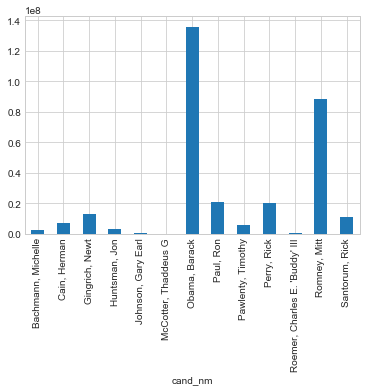

In [40]:
# PLot out total donation amounts
cand_amount.plot(kind='bar')

Now the comparison is very easy to see. As we saw berfore, clearly Obama is the front-runner in donation amounts, which makes sense, since he is not competeing with any other democratic nominees. How about we just compare Democrat versus Republican donations?

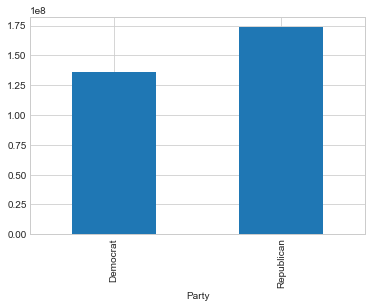

In [41]:
# Groupby party and then count donations
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')



Great Job so far!


## Question 12: Keep on exploring these two datasets



There's still so much to discover in these rich datasets! Come up with your own political questions you want answered! Or just play around with different methods of visualizing the data!


In [ ]:
# Your code





For more on general data analysis of politics, I highly suggest the [538](/) website!http://fivethirtyeight.com/politics

Again, great job on getting through the course this far! Go ahead and search the web for more data to discover!